### - Mini Project

In [34]:
# 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import koreanize_matplotlib

In [35]:
DATA_FILE = '../data/전세계GDP.csv'
df = pd.read_csv(DATA_FILE)

## 분석 진행할 나라들만 뽑아오기
countries = ['United States', 'Japan', 'Korea, Republic of',
             'Sweden', 'Norway', 'Denmark',
             "China, People's Republic of", 'Vietnam',
             'Venezuela', 'Nicaragua']

mask = df['GDP, current prices (Billions of U.S. dollars)'].isin(countries)

df = df[mask]

display(df)

,"GDP, current prices (Billions of U.S. dollars)",1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
37,"China, People's Republic of",303.55,289.215,285.139,306.013,314.832,310.709,301.471,328.305,409.363,...,18190.803,18307.816,18270.351,18749.759,19398.577,20650.754,22016.582,23451.376,24852.392,26336.991
47,Denmark,70.811,61.46,60.084,60.331,58.869,62.452,87.749,109.183,115.54,...,406.11,400.115,404.652,424.525,459.612,500.051,521.566,542.455,563.668,585.835
86,Japan,1129.378,1245.221,1158.731,1270.86,1345.825,1427.02,2120.084,2580.749,3125.725,...,5039.148,4263.231,4204.573,4019.382,4279.828,4463.634,4624.079,4820.609,4947.728,5119.885
91,"Korea, Republic of",66.517,74.287,79.912,89.621,99.75,103.764,119.966,152.241,205.479,...,1942.314,1799.363,1844.801,1875.388,1858.572,1936.617,2017.01,2099.702,2184.804,2271.152
127,Nicaragua,1.832,2.156,2.497,2.9,3.966,3.854,5.8,3.409,1.499,...,14.208,15.634,17.813,19.694,20.689,21.86,23.183,24.618,26.142,27.761
131,Norway,64.439,63.597,62.647,61.627,62.058,65.417,78.693,94.231,101.901,...,503.368,596.298,482.95,483.593,517.102,547.693,566.059,583.576,602.031,621.811
168,Sweden,140.151,127.935,112.912,103.682,107.978,112.932,149.282,181.81,205.868,...,631.693,575.071,578.991,603.715,662.318,711.503,740.513,770.062,800.502,832.1
188,United States,2857.325,3207.025,3343.8,3634.025,4037.65,4339,4579.625,4855.25,5236.425,...,23725.65,26054.6,27811.5,29298.025,30615.743,31821.293,33019.978,34258.401,35513.831,36814.251
192,Venezuela,69.841,78.367,79.998,79.672,57.826,59.865,60.877,46.854,60.378,...,56.615,89.013,102.377,119.803,82.767,79.916,no data,no data,no data,no data
193,Vietnam,35.357,17.617,23.369,35.204,61.171,19.045,43.009,53.385,29.501,...,370.076,411.068,433.008,459.472,484.726,511.059,545.213,583.731,624.103,666.786


In [36]:
## 각 나라별로 어떤 주의인지 체크하는 컬럼 만들어주기
ideology_map = {
    'United States': '민주자본주의',
    'Japan': '민주자본주의',
    'Korea, Republic of': '민주자본주의',
    
    'Sweden': '민주사회주의',
    'Norway': '민주사회주의',
    'Denmark': '민주사회주의',
    
    "China, People's Republic of": '공산자본주의',
    'Vietnam': '공산자본주의',
    
    'Venezuela': '공산사회주의',      
    'Nicaragua': '공산사회주의'
}
df['체제'] = df['GDP, current prices (Billions of U.S. dollars)'].map(ideology_map)


# Country, 체제, 나머지 연도들 순으로 재정렬
cols = df.columns.tolist()
new_cols = ['GDP, current prices (Billions of U.S. dollars)', '체제'] + [c for c in cols if c not in ['GDP, current prices (Billions of U.S. dollars)', '체제']]
df = df[new_cols]

## GDP, current prices (Billions of U.S. dollars) 열 이름 Country로 변경하기
df.rename(columns={df.columns[0]: 'Country'}, inplace=True)

## 중국과 한국 이름 바꿔주기
replace_map = {
    "China, People's Republic of": "China",
    'Korea, Republic of': 'Korea',   
}

df['Country'] = df['Country'].replace(replace_map)

df

,Country,체제,1980,1981,1982,1983,1984,1985,1986,1987,...,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
37,China,공산자본주의,303.55,289.215,285.139,306.013,314.832,310.709,301.471,328.305,...,18190.803,18307.816,18270.351,18749.759,19398.577,20650.754,22016.582,23451.376,24852.392,26336.991
47,Denmark,민주사회주의,70.811,61.46,60.084,60.331,58.869,62.452,87.749,109.183,...,406.11,400.115,404.652,424.525,459.612,500.051,521.566,542.455,563.668,585.835
86,Japan,민주자본주의,1129.378,1245.221,1158.731,1270.86,1345.825,1427.02,2120.084,2580.749,...,5039.148,4263.231,4204.573,4019.382,4279.828,4463.634,4624.079,4820.609,4947.728,5119.885
91,Korea,민주자본주의,66.517,74.287,79.912,89.621,99.75,103.764,119.966,152.241,...,1942.314,1799.363,1844.801,1875.388,1858.572,1936.617,2017.01,2099.702,2184.804,2271.152
127,Nicaragua,공산사회주의,1.832,2.156,2.497,2.9,3.966,3.854,5.8,3.409,...,14.208,15.634,17.813,19.694,20.689,21.86,23.183,24.618,26.142,27.761
131,Norway,민주사회주의,64.439,63.597,62.647,61.627,62.058,65.417,78.693,94.231,...,503.368,596.298,482.95,483.593,517.102,547.693,566.059,583.576,602.031,621.811
168,Sweden,민주사회주의,140.151,127.935,112.912,103.682,107.978,112.932,149.282,181.81,...,631.693,575.071,578.991,603.715,662.318,711.503,740.513,770.062,800.502,832.1
188,United States,민주자본주의,2857.325,3207.025,3343.8,3634.025,4037.65,4339,4579.625,4855.25,...,23725.65,26054.6,27811.5,29298.025,30615.743,31821.293,33019.978,34258.401,35513.831,36814.251
192,Venezuela,공산사회주의,69.841,78.367,79.998,79.672,57.826,59.865,60.877,46.854,...,56.615,89.013,102.377,119.803,82.767,79.916,no data,no data,no data,no data
193,Vietnam,공산자본주의,35.357,17.617,23.369,35.204,61.171,19.045,43.009,53.385,...,370.076,411.068,433.008,459.472,484.726,511.059,545.213,583.731,624.103,666.786


<Figure size 1600x600 with 0 Axes>

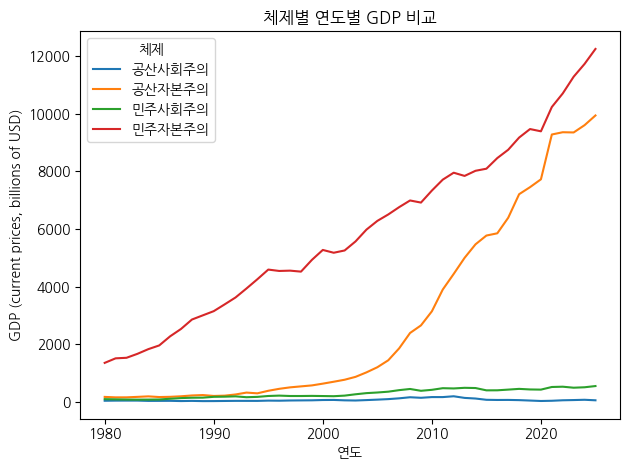

In [37]:
year_cols = [c for c in df.columns if str(c).isdigit() and int(c) <= 2025]

df_long = df.melt(
    id_vars=['Country', '체제'],
    value_vars=year_cols,
    var_name='연도',
    value_name='GDP'
)

# 연도는 숫자로
df_long['연도'] = df_long['연도'].astype(int)

df_long['GDP'] = pd.to_numeric(df_long['GDP'], errors='coerce')

df_ideology = (
    df_long
    .groupby(['체제', '연도'], as_index=False)['GDP']
    .mean()
)

pivot = df_ideology.pivot(index='연도', columns='체제', values='GDP')

plt.figure(figsize=(16, 6))
pivot.plot()
plt.xlabel('연도')
plt.ylabel('GDP (current prices, billions of USD)')
plt.title('체제별 연도별 GDP 비교')
plt.legend(title='체제')
plt.tight_layout()
plt.show()


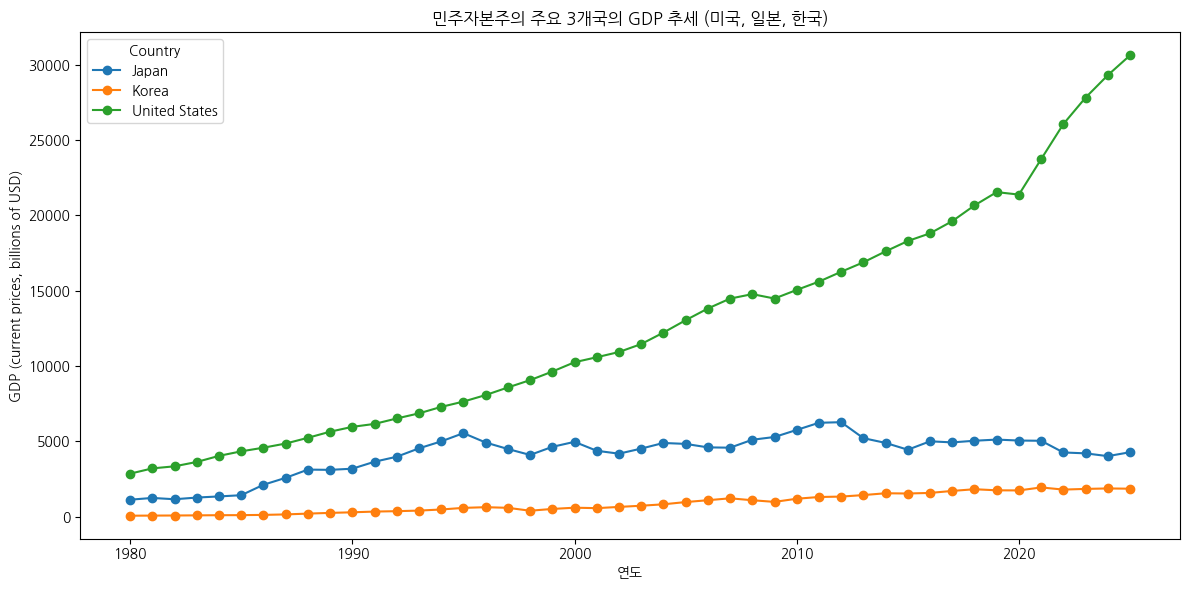

In [38]:
# 민주자본주의 3개국 필터
demo_capitalist = df_long[df_long['체제'] == '민주자본주의']
demo_capitalist = demo_capitalist[demo_capitalist['Country'].isin(['United States', 'Japan', 'Korea'])]

# 피벗: 연도별 GDP (국가별 비교)
pivot_demo = demo_capitalist.pivot(index='연도', columns='Country', values='GDP')

# 시각화
plt.figure(figsize=(12, 6))
for country in pivot_demo.columns:
    plt.plot(pivot_demo.index, pivot_demo[country], marker='o', label=country)

plt.xlabel('연도')
plt.ylabel('GDP (current prices, billions of USD)')
plt.title('민주자본주의 주요 3개국의 GDP 추세 (미국, 일본, 한국)')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

위의 그래프를 보았을 때 자본주의가 GDP가 더욱 높은 값을 볼 수 있었고, 공산주의 보단 민주주의가 GDP가 높은 모습을 볼 수 있다.

-> 왜 민주자본주의에서 GDP가 제일 높을까?

국가별 무역 빈도?

In [39]:
DATA_FILE2 = '../data/나라별 무역.csv'

df_trade = pd.read_csv(DATA_FILE2, skiprows=4)

df_trade = df_trade.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1)

country_list = ['Denmark', 'Norway', 'Sweden',
        'United States', 'Japan', 'Korea, Rep.',
        'Venezuela, RB', 'Viet Nam', 'China', 'Nicaragua']

df_trade_filtered = df_trade[df_trade['Country Name'].isin(country_list)]

df_trade_filtered = df_trade_filtered.iloc[:, :66]
df_trade_filtered


year_cols = [c for c in df_trade_filtered.columns if str(c).isdigit()]

# 2) 연도 컬럼 숫자로 변환
df_trade_filtered[year_cols] = df_trade_filtered[year_cols].apply(
    pd.to_numeric,
    errors='coerce'
)

# 3) 각 나라(행) 기준으로 결측치를 그 행의 평균값으로 채우기
df_trade_filtered[year_cols] = df_trade_filtered[year_cols].apply(
    lambda row: row.fillna(row.mean()),
    axis=1
)

df_trade_filtered

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
40,China,6.305576,5.808546,5.565523,5.662062,5.716907,5.899470,5.927989,5.582337,5.578898,...,38.697185,36.177171,36.950853,36.894384,35.199420,34.038951,36.520691,37.440720,36.105192,37.198420
58,Denmark,79.969478,79.969478,79.969478,79.969478,79.969478,79.969478,57.655402,55.545827,55.327767,...,105.130362,101.452784,104.215677,108.813986,111.891475,104.433433,111.414044,131.543151,127.768567,128.643002
119,Japan,25.247987,25.247987,25.247987,25.247987,25.247987,25.247987,25.247987,25.247987,25.247987,...,35.427408,31.310247,34.423214,36.609932,35.216418,31.335209,36.738446,46.812987,45.150880,25.247987
126,"Korea, Rep.",14.605842,17.998011,19.486198,18.611379,17.344870,21.457782,26.657912,28.791108,32.778073,...,79.132494,73.603809,77.120918,78.988866,75.757139,69.034045,80.199457,96.536409,87.939679,58.871659
175,Nicaragua,49.821986,47.955222,55.335081,59.066799,59.373952,61.707598,61.235779,61.506021,57.077166,...,98.194165,93.813728,96.380586,93.984740,94.042216,88.638123,106.207391,115.454679,105.003098,98.525838
177,Norway,71.545700,71.545700,71.545700,71.545700,71.545700,71.545700,71.545700,71.545700,71.545700,...,70.431857,69.116842,69.108782,70.003196,70.895821,65.353979,71.222714,82.609480,80.363846,81.222146
223,Sweden,42.260547,40.073385,39.401827,39.553192,40.229814,40.400867,39.459484,38.314380,39.266768,...,84.157174,83.263801,85.921250,90.129696,92.521083,84.330782,90.277986,105.855015,106.740878,104.810994
251,United States,9.197433,8.938207,8.934736,8.961578,9.206548,9.236671,9.578519,9.686929,10.031656,...,27.688214,26.452598,27.125338,27.445359,26.258481,23.079778,25.213656,26.891690,24.899363,24.887992
254,"Venezuela, RB",48.582058,48.655639,49.579340,47.224570,48.161181,48.224918,44.813999,44.635916,44.789503,...,49.820773,49.820773,49.820773,49.820773,49.820773,49.820773,49.820773,49.820773,49.820773,49.820773
257,Viet Nam,114.876685,114.876685,114.876685,114.876685,114.876685,114.876685,114.876685,114.876685,114.876685,...,144.914228,145.409508,160.980084,164.663937,164.704215,163.245863,186.675833,183.153619,164.818071,114.876685


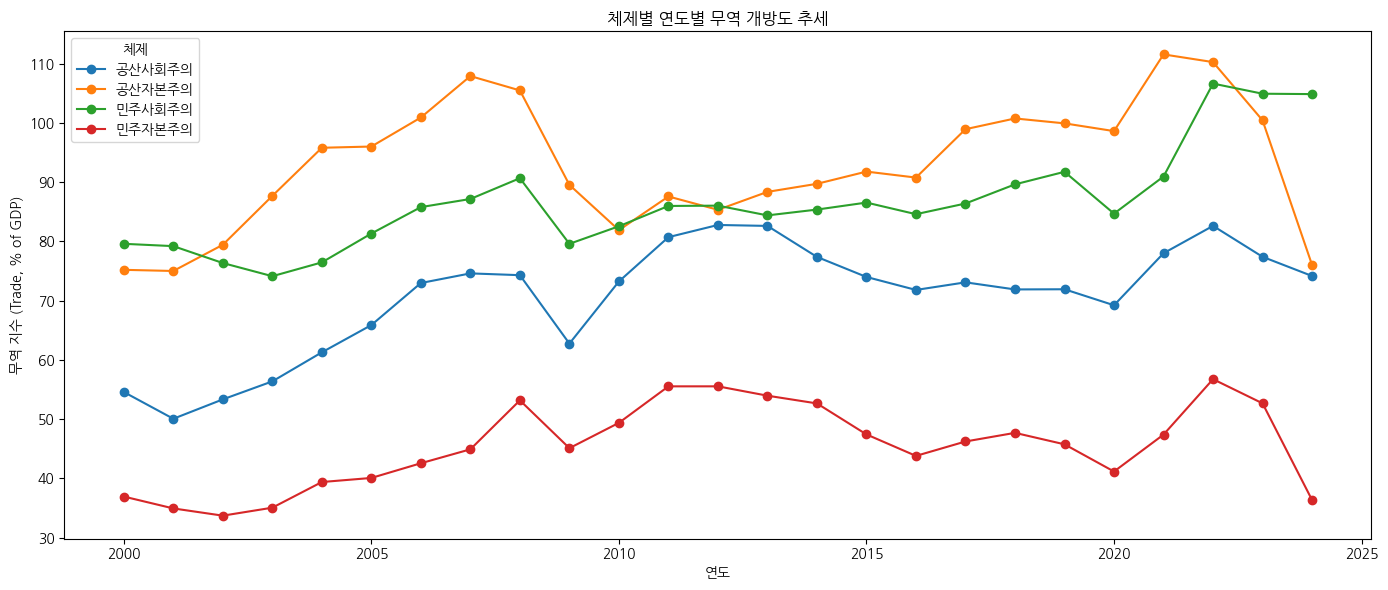

In [40]:
ideology_map = {
    # 민주자본주의
    'United States': '민주자본주의',
    'Japan': '민주자본주의',
    'Korea, Rep.': '민주자본주의',

    # 민주사회주의
    'Denmark': '민주사회주의',
    'Norway': '민주사회주의',
    'Sweden': '민주사회주의',

    # 공산자본주의
    'China': '공산자본주의',
    'Viet Nam': '공산자본주의',

    # 공산사회주의
    'Venezuela, RB': '공산사회주의',
    'Nicaragua': '공산사회주의'
}

df_trade_filtered['체제'] = df_trade_filtered['Country Name'].map(ideology_map)


trade_long = df_trade_filtered.melt(
    id_vars=['Country Name', '체제'],
    value_vars=year_cols,
    var_name='연도',
    value_name='무역지수'
)

# 2) 자료형 정리
trade_long['연도'] = trade_long['연도'].astype(int)
trade_long['무역지수'] = pd.to_numeric(trade_long['무역지수'], errors='coerce')

# 3) 체제별, 연도별 평균 무역지수
trade_ideo = (
    trade_long
    .groupby(['체제', '연도'], as_index=False)['무역지수']
    .mean()
)

trade_ideo = trade_ideo[trade_ideo['연도'] >= 2000]


pivot_trade = trade_ideo.pivot(index='연도', columns='체제', values='무역지수')

plt.figure(figsize=(14, 6))
for ideology in pivot_trade.columns:
    plt.plot(pivot_trade.index, pivot_trade[ideology], marker='o', label=ideology)

plt.xlabel('연도')
plt.ylabel('무역 지수 (Trade, % of GDP)')
plt.title('체제별 연도별 무역 개방도 추세')
plt.legend(title='체제')
plt.tight_layout()
plt.show()

In [41]:
# 2024년 데이터만 필터링
gdp_2024 = df_long[df_long['연도'] == 2024].copy()
trade_2024 = trade_long[trade_long['연도'] == 2024].copy()

# trade_long은 Country Name, df_long은 Country라면 이름 맞춰주기
trade_2024 = trade_2024.rename(columns={'Country Name': 'Country'})

# 2두 데이터 합치기 (Country, 체제, 연도 기준)
merged_2024 = pd.merge(
    gdp_2024,
    trade_2024[['Country', '체제', '연도', '무역지수']],
    on=['Country', '체제', '연도'],
    how='inner'
)

# 무역 절대규모 계산 (GDP가 billions 단위면 이것도 billions 단위)
merged_2024['무역규모'] = merged_2024['GDP'] * (merged_2024['무역지수'] / 100)

# 체제별 요약 (평균 GDP, 평균 무역지수, 평균 무역규모)
summary_2024 = (
    merged_2024
    .groupby('체제', as_index=False)[['GDP', '무역지수', '무역규모']]
    .mean()
)

display(summary_2024)

,체제,GDP,무역지수,무역규모
0,공산사회주의,19.694000,98.525838,19.403678
1,공산자본주의,18749.759000,37.198420,6974.614128
2,민주사회주의,503.944333,104.892047,523.888669
3,민주자본주의,16658.703500,25.067989,4153.251535


무역지수가 적은데 왜 GDP가 클까 -> 알고보니 무역지수가 중요한 것이 아니라 무역규모가 중요한 것이 였음. GDP에 무역지수를 곱하면 민주자본주의가 가장 높았다.

이번엔 R&D 투자 비중으로 해보자

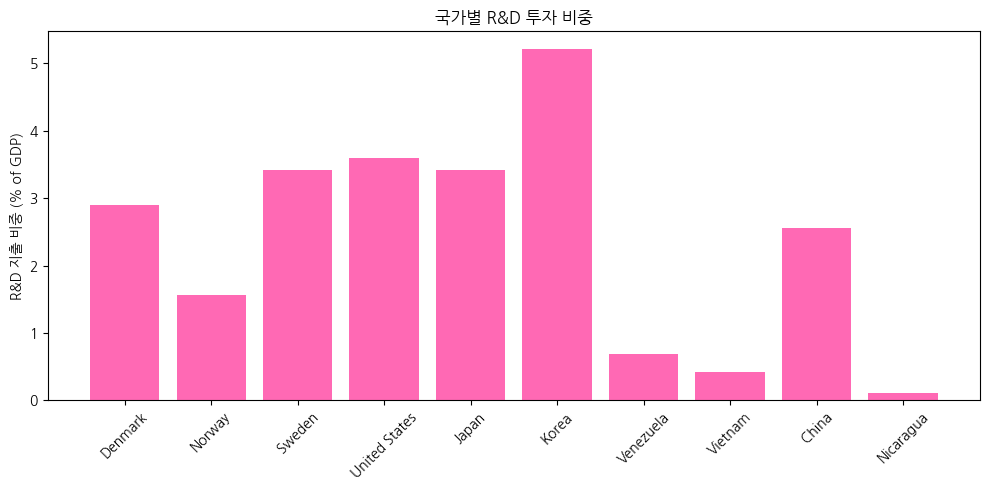

In [42]:
# 1) 데이터프레임 만들기
data = {
    'Country': ['Denmark', 'Norway', 'Sweden',
                'United States', 'Japan', 'Korea',
                'Venezuela', 'Vietnam', 'China', 'Nicaragua'],
    'R&D_ratio': [2.89, 1.56, 3.41,
                  3.59, 3.41, 5.21,
                  0.69, 0.42, 2.56, 0.11]
}

df_rd = pd.DataFrame(data)

df_rd['체제'] = df_rd['Country'].map(ideology_map)

# 3) 국가별 막대그래프
plt.figure(figsize=(10, 5))
x = range(len(df_rd))

plt.bar(x, df_rd['R&D_ratio'], color= 'hotpink')
plt.xticks(x, df_rd['Country'], rotation=45)
plt.ylabel('R&D 지출 비중 (% of GDP)')
plt.title('국가별 R&D 투자 비중')

plt.tight_layout()
plt.show()

,체제,R&D_ratio
0,공산사회주의,0.11
1,공산자본주의,2.56
2,민주사회주의,2.62
3,민주자본주의,3.50


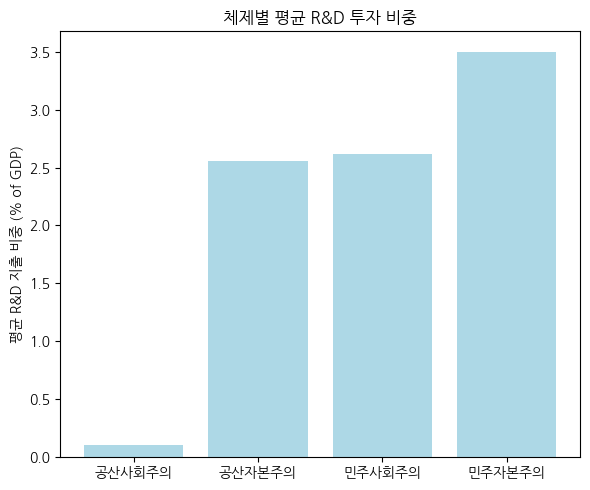

In [43]:
# 1) 체제별 평균 R&D 투자 비중 계산
df_mean = df_rd.groupby('체제', as_index=False)['R&D_ratio'].mean()

# 값 확인하기
display(df_mean)  

# 2) 체제별 막대그래프
plt.figure(figsize=(6, 5))

x = range(len(df_mean))

plt.bar(x, df_mean['R&D_ratio'], color='lightblue')
plt.xticks(x, df_mean['체제'])
plt.ylabel('평균 R&D 지출 비중 (% of GDP)')
plt.title('체제별 평균 R&D 투자 비중')

plt.tight_layout()
plt.show()

민주자본주의 => 시장경쟁 + 민간 혁신 투자 활발, 산업 R&D 비중 세계 최상위

그렇다면 GDP가 가장 높은 민주자본주의는 행복할까?

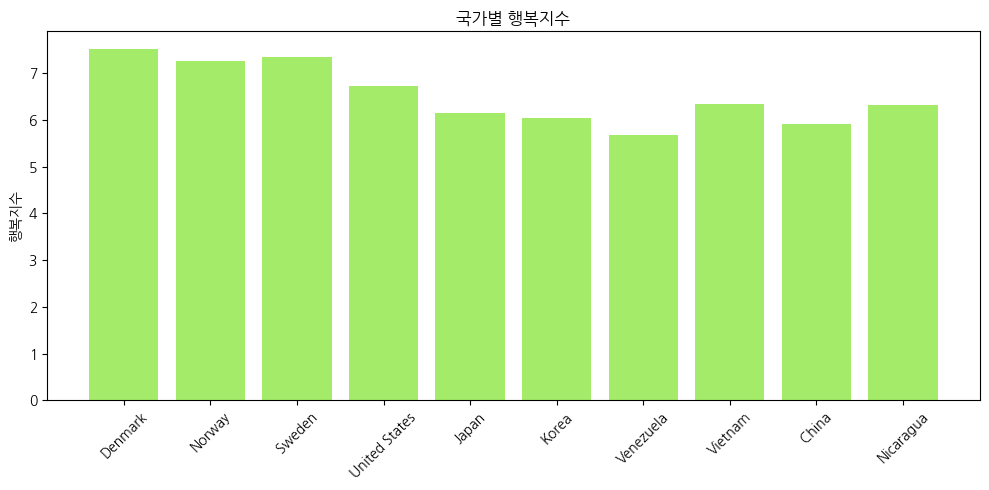

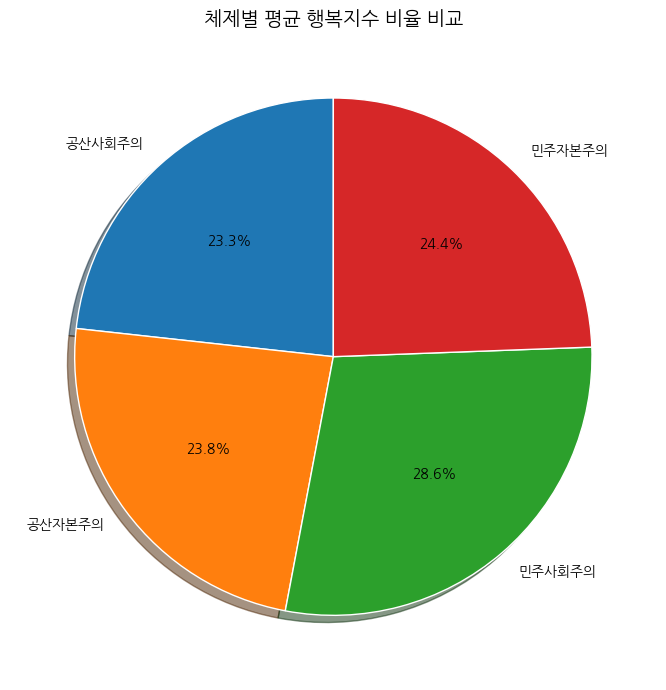

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# 행복지수 데이터프레임 생성
data = {
    'Country': ['Denmark', 'Norway', 'Sweden',
                'United States', 'Japan', 'Korea',
                'Venezuela', 'Vietnam', 'China', 'Nicaragua'],
    'Happiness': [7.521, 7.262, 7.345,
                  6.724, 6.147, 6.038,
                  5.683, 6.352, 5.921, 6.330]
}

df_happy = pd.DataFrame(data)

# 체제 구분 매핑
ideology_map = {
    'Denmark': '민주사회주의',
    'Norway': '민주사회주의',
    'Sweden': '민주사회주의',
    'United States': '민주자본주의',
    'Japan': '민주자본주의',
    'Korea': '민주자본주의',
    'China': '공산자본주의',
    'Vietnam': '공산자본주의',
    'Venezuela': '공산사회주의',
    'Nicaragua': '공산사회주의'
}

plt.figure(figsize=(10, 5))
x = range(len(df_happy))

plt.bar(x, df_happy['Happiness'], color = "#A3EB68")
plt.xticks(x, df_happy['Country'], rotation=45)
plt.ylabel('행복지수')
plt.title('국가별 행복지수')
plt.tight_layout()
plt.show()

df_happy['체제'] = df_happy['Country'].map(ideology_map)

# 체제별 평균 행복지수 계산
df_mean = df_happy.groupby('체제', as_index=False)['Happiness'].mean()

# 파이 그래프 그리기
plt.figure(figsize=(7, 7))
plt.pie(
    df_mean['Happiness'],
    labels=df_mean['체제'],
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    wedgeprops={'edgecolor': 'white'}
)
plt.title('체제별 평균 행복지수 비율 비교', fontsize=14)
plt.tight_layout()
plt.show()


막상 출력해보니 GDP가 높은 민주자본주의보다 민주사회주의가 더 높은 모습을 보였다. 왜일까??

-> 국가 안에서 개인 자유도에 대해서 조사해보자

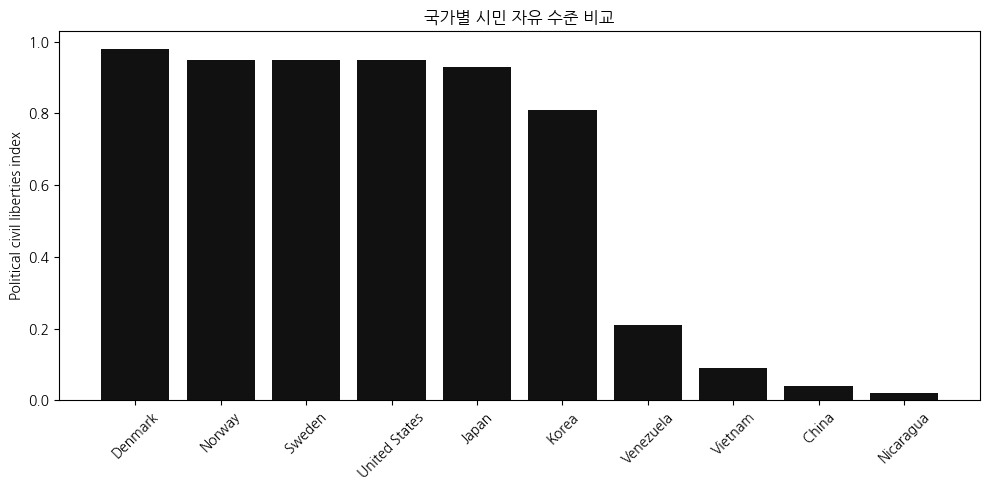

       체제  CivilLibertyIndex
0  공산사회주의           0.115000
1  공산자본주의           0.065000
2  민주사회주의           0.960000
3  민주자본주의           0.896667


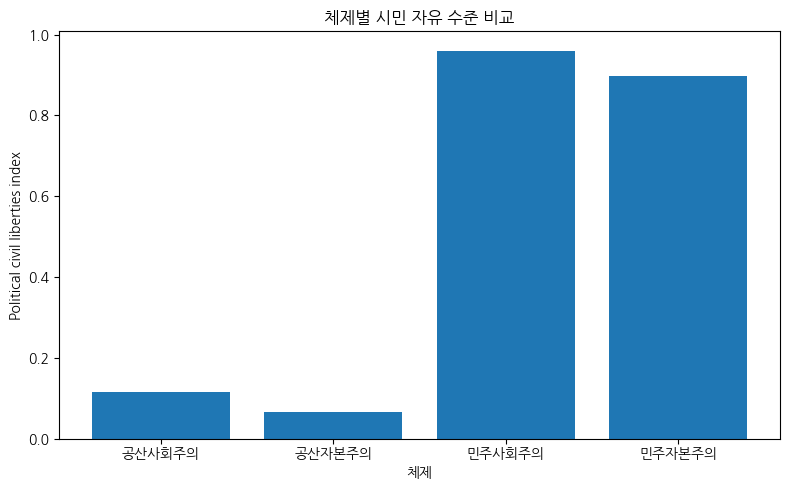

In [ ]:
## 

civil_df = pd.DataFrame({
    'Country': [
        'Denmark', 'Norway', 'Sweden',
        'United States', 'Japan', 'Korea',
        'Venezuela', 'Vietnam', 'China', 'Nicaragua'
    ],
    'CivilLibertyIndex': [
        0.98, 0.95, 0.95,
        0.95, 0.93, 0.81,
        0.21, 0.09, 0.04, 0.02
    ]
})

plt.figure(figsize=(10, 5))
x = range(len(civil_df))

plt.bar(x, civil_df['CivilLibertyIndex'], color = '#111111')
plt.xticks(x, civil_df['Country'], rotation=45)
plt.ylabel('Political civil liberties index')
plt.title('국가별 시민 자유 수준 비교')
plt.tight_layout()
plt.show()

df_merge = df.merge(civil_df, on='Country', how='left')

ideology_liberty = (
    df_merge
    .groupby('체제', as_index=False)['CivilLibertyIndex']
    .mean()
)
print(ideology_liberty)


plt.figure(figsize=(8, 5))
plt.bar(ideology_liberty['체제'], ideology_liberty['CivilLibertyIndex'])
plt.xlabel('체제')
plt.ylabel('Political civil liberties index')
plt.title('체제별 시민 자유 수준 비교')
plt.tight_layout()
plt.show()



### 민주주의가 공산주의보다 시민 자유 수준이 훨씬 높은 것을 볼 수 있다.

- 결론 인사이트
=> GDP는 민주자본주의가 가장 높은데 그에 따라 무역규모도 가장 큰 것을 볼 수 있고,
   따라서 GDP가 높은 만큼 국가의 국민들이 행복한 줄 알았는데? 젤 높지 않았고
   의외로 민주사회주의가 높아서 알아보니 시민 자유 수준이 가장 높아서 였음을 알 수 있었다.